### Section 1: Business Understanding

**Question II:** What are the effects of social preferences on happiness in workplaces?

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

from util.task2_utils import clean_data, coef_weights, plot_result

### Section 2: Data Understanding

In this section we are interested about columns in the dataset that describe the social life or social preferences of an individual. These are: ['FriendsDevelopers', 'HomeRemote', 'ProgramHobby', 'FormalEducation', 'OtherPeoplesCode', 'HighestEducationParents', 'KinshipDevelopers']. The exact meaning of these columns can be understood from the survey_results_schema.csv file where it's described.

In [18]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Section 3: Data Preparation

In this section the clean_data() function is called. This function does all the preprocessing needed for the usage of the linear model: the needed data is split into X (features - list described above) and Y (target - Job Satisfaction). 
<br>Rows where Job Satisfaction is not given are excluded, while missing values in X are handled with the cutoff technique: it's a now fixed value that allows a set amount of missing values for each column in X.
<br>Then dummy variables are created for each categorical value (in this analysis, all features in X are categorical, so no handling as needed for numerical values).
<br>Finally, X and Y are split into training and testing datasets.

In [19]:
# Cleaning and splitting the necessary subsets of the dataframe
X_train, X_test, y_train, y_test = clean_data(df, test_size = 0.2)

### Section 3: Modeling

A linear regression model is fit onto the training data, and the coefficients of this model are later used to conclude results. These coefficients are calculated by the coef_weights() function.

In [20]:
# Fitting the linear model on the training data, then getting the coefficients for each feature
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
coef_df = coef_weights(lm_model, X_train)
coef_df.head(15)

,est_int,coefs,abs_coefs
15,OtherPeoplesCode_Strongly agree,-0.464399,0.464399
19,KinshipDevelopers_Disagree,-0.443638,0.443638
6,HomeRemote_Never,-0.353839,0.353839
4,HomeRemote_All or almost all the time (I'm ful...,0.325450,0.325450
13,OtherPeoplesCode_Disagree,0.316639,0.316639
11,FormalEducation_Secondary school,0.245950,0.245950
20,KinshipDevelopers_Somewhat agree,-0.241948,0.241948
21,KinshipDevelopers_Strongly agree,0.223886,0.223886
9,"ProgramHobby_Yes, both",0.146338,0.146338
7,"ProgramHobby_Yes, I contribute to open source ...",0.123724,0.123724


#### Section 5: Evaluating Results

Now that we have the counts accumulated for both columns, the next step is to visualize these values in an understandable manner.

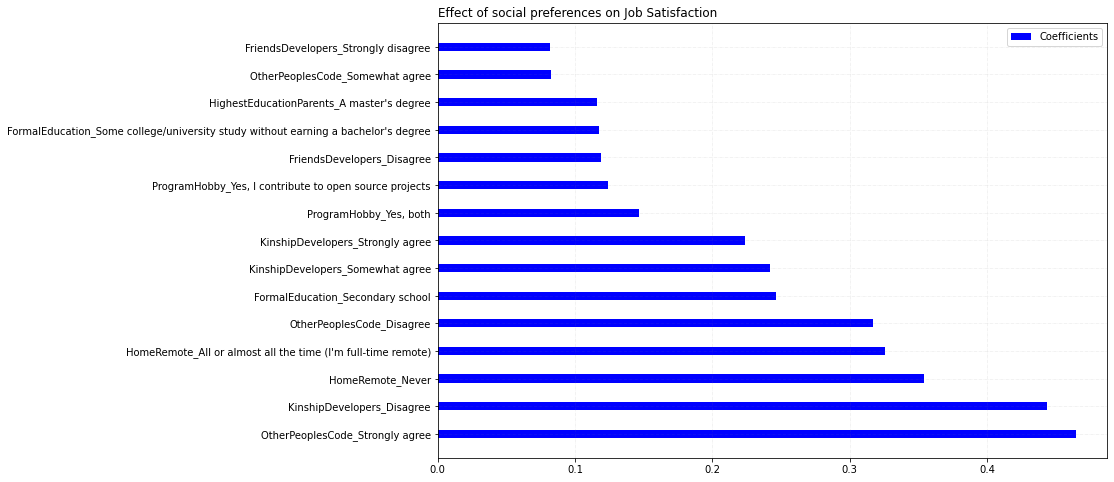

In [21]:
# Plotting each calculated coefficient
plot_result(coef_df)

Higher values mean the variable has a higher contribution to high job satisfaction. Some of the top contributing values:

- a person has higher job satisfaction on average if he/she doesn’t like to review collegue’s codes
- being alienated from other developers surprisingly also raises happiness
- if their preferences are met with fully home-office, or full office attendance

<br>All of this is a bit surprising but can be explained: introverted people seem to be more satisfied with their programming job. It is also important whether a person needs less or more social interaction, their needs are met with their work contract. This meaning, provide opportunity for more extroverted people to socialize on a regular basis, but it also contributes a lot to happiness for introverts to let them work from home. Surprisingly both options seem to be happier than hybrid workers.